In [1]:
import datetime
import pandas as pd
from ahh import era, ext, vis
from matplotlib.dates import DateFormatter

%matplotlib inline

/home/solactus/anaconda3/lib/python3.5/site-packages/matplotlib/ticker.py:1693: UserWarning: Steps argument should be a sequence of numbers
increasing from 1 to 10, inclusive. Behavior with
values outside this range is undefined, and will
raise a ValueError in future versions of mpl.
  warnings.warn('Steps argument should be a sequence of numbers\n'


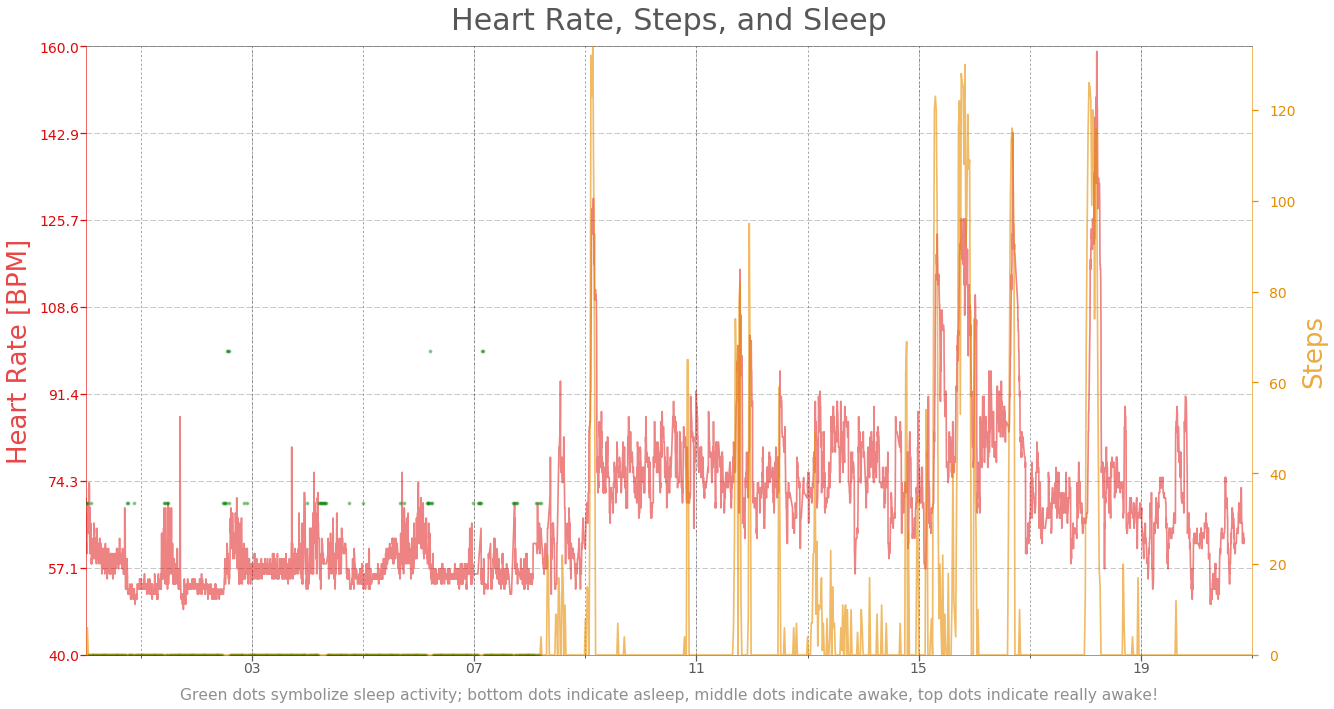

In [131]:
df = pd.read_csv('mar3heart.csv')
df.columns = ['date', 'heart_bpm']
df['date'] = era.time2dt(df['date'], strf='infer')
df.set_index('date', inplace=True)

df2 = pd.read_csv('mar3activity.csv')
df2.columns = ['date', 'calories', 'steps', 'distance', 'floors']
df2['date'] = era.time2dt(df2['date'], strf='infer')
df2.set_index('date', inplace=True)

df3 = pd.read_csv('mar3sleep.csv')
df3.columns = ['id', 'date', 'state']
df3['date'] = era.time2dt(df3['date'], strf='infer')
df3.set_index('date', inplace=True)
df3.loc[df3['state'] == 'Awake', 'id'] = 0.25
df3.loc[df3['state'] == 'Really Awake', 'id'] = 0.5
df3.loc[df3['state'] == 'Asleep', 'id'] = 0

xlim1 = era.dt2num(df.index[0])
xlim2 = era.dt2num(df.index[0] + datetime.timedelta(hours=21))
xlim = (xlim1, xlim2)
ax = vis.plot_line(df.index, df['heart_bpm'], ylabel='Heart Rate [BPM]', title='Heart Rate, Steps, and Sleep',
                   rows=2, figsize=(18, 10))
ax2 = vis.plot_scatter(df3.index, df3['id'], rows=2, scale=1, alpha=0.35, color='green', twinx=ax, ylim=(0, 1), size=0.5)
ax3 = vis.plot_line(df2.index, df2['steps'], xlabel='Hour (CST)',
                    ylabel='Steps', twinx=ax, alpha=0.6, xlim=xlim, color=vis.COLORS['orange'])
vis.set_major_tick_labels(ax2, left=False, right=False)
vis.set_major_ticks(ax2, left=False, right=False)
figtext = 'Green dots symbolize sleep activity; bottom dots indicate asleep, middle dots indicate awake,' \
          ' top dots indicate really awake!'
vis.set_figtext(ax3, figtext, loc='center bottom', bmarg_off=-1.1, scale=1.35)

In [2]:
df = pd.read_csv('minuteheart.csv')
df.columns = ['date', 'heart_bpm']
df
df.index = era.time2dt(df['date'], strf='infer')
df['date'] = df.index.date
df['hour'] = df.index.hour
df['weekday'] = df.index.weekday

print(df.loc[df['heart_bpm'] == df['heart_bpm'].max()])
print(df['2017-02-26']['heart_bpm'].mean())

date_df = df.groupby('date').mean()
date_df.index = era.time2dt(date_df.index, strf='infer')

hourly_df = df.groupby('hour').mean()

weekday_df = df.groupby('weekday').mean()

                           date  heart_bpm  hour  weekday
date                                                     
2017-02-23 17:43:10  2017-02-23        206    17        3
72.70021052631579


In [3]:
vis_dict = dict(figsize=(18, 4), ylabel='Heart Rate [BPM]')

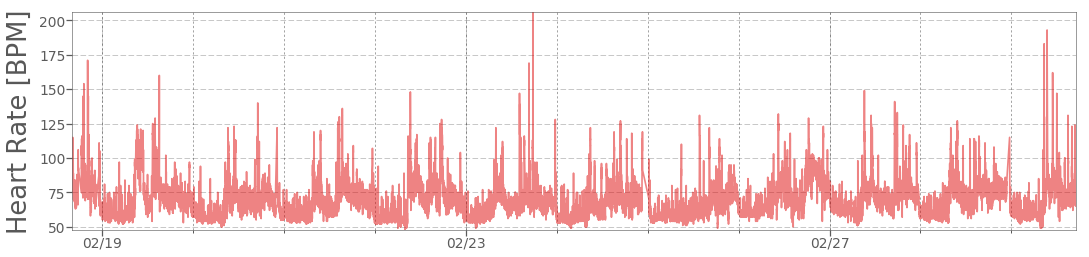

In [4]:
ax = vis.plot_line(df.index, df['heart_bpm'], **vis_dict)

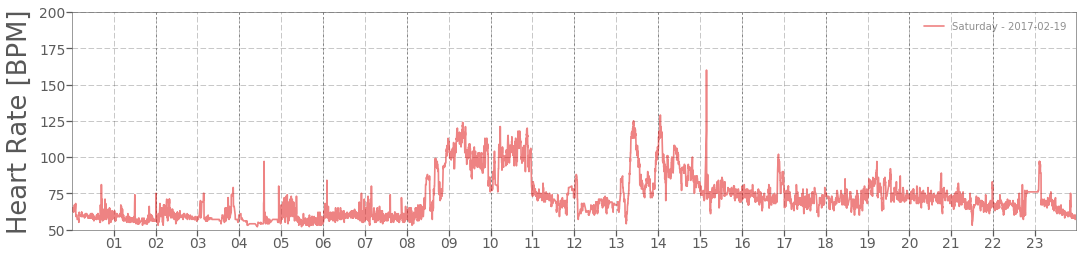

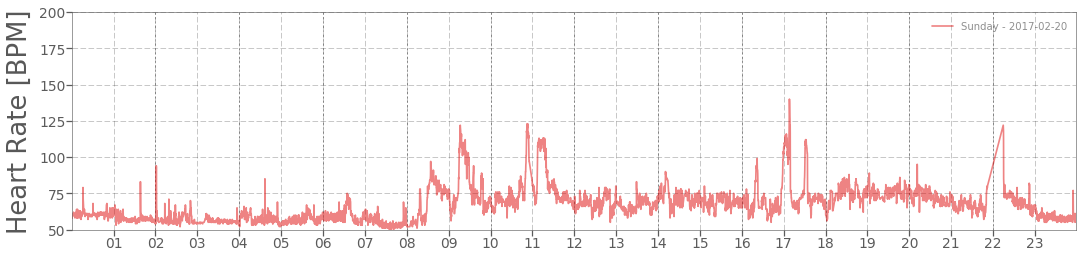

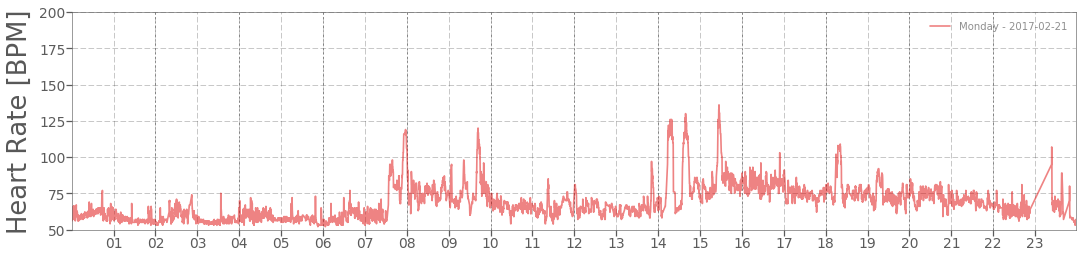

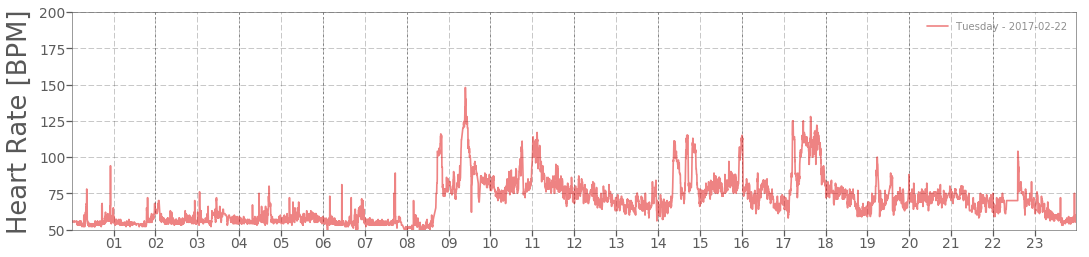

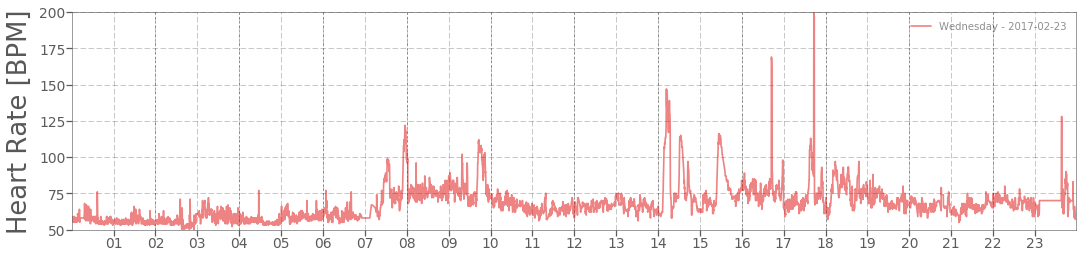

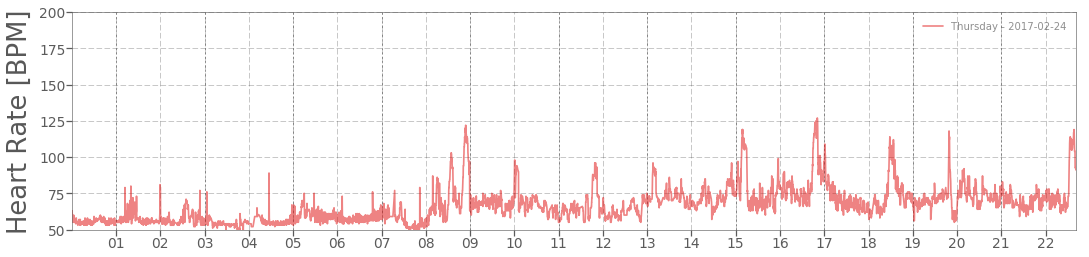

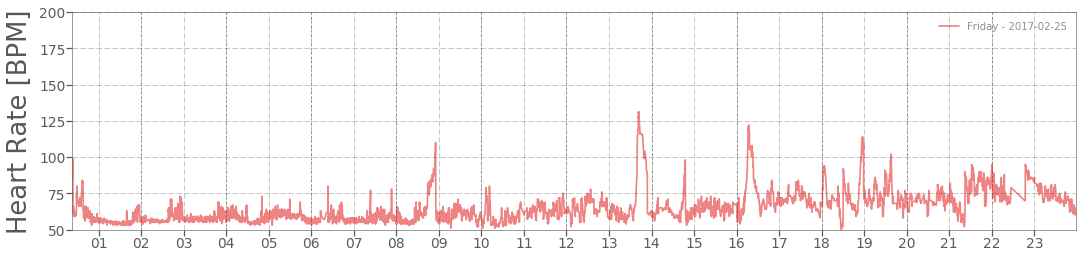

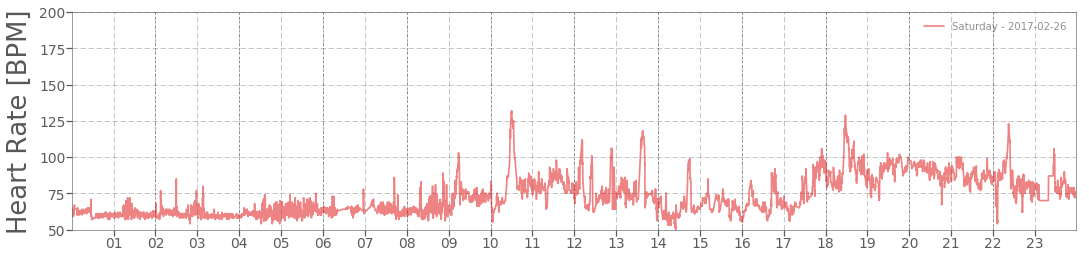

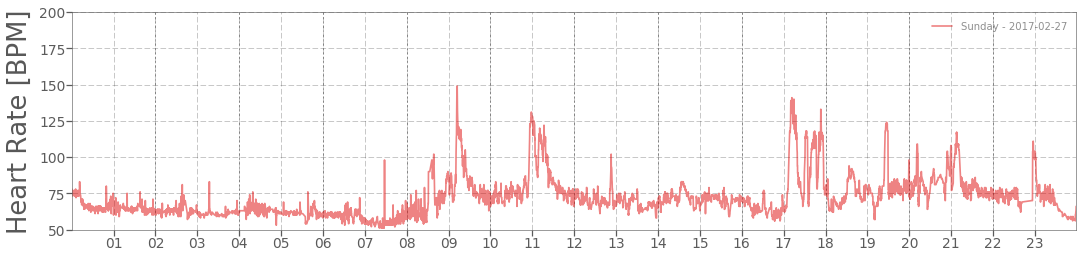

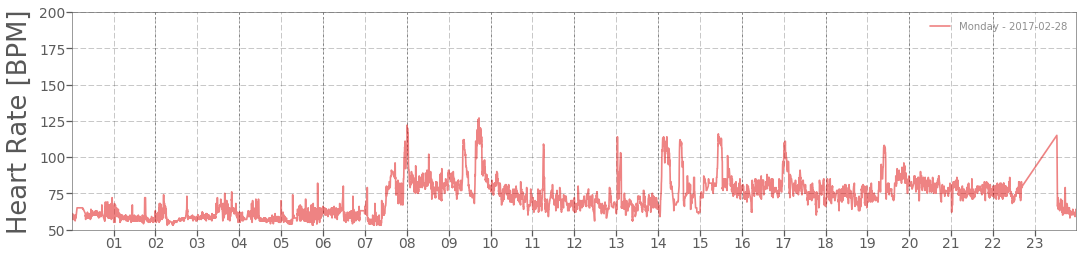

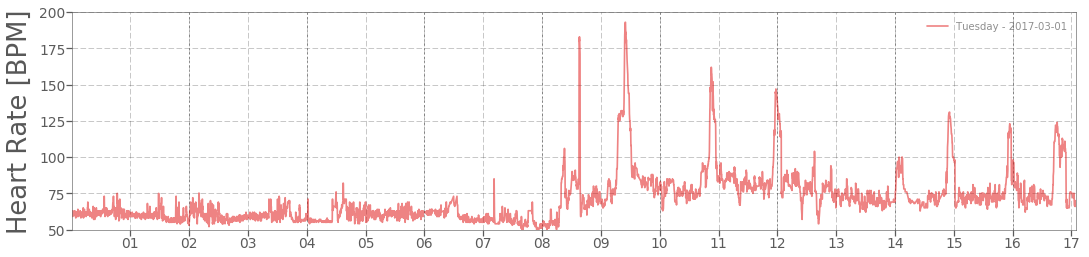

In [5]:
start_dt = datetime.datetime(2017, 2, 19)
dts = pd.date_range(start_dt, periods=len(date_df) - 1, freq='D')
td = datetime.timedelta(days=1)
for dt in dts:
    try:
        weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
        daily_df = df.loc[(df.index > dt) & (df.index < dt + td)]
        label_fmt = '{0} - {1}'.format(weekdays[dt.weekday()], dt.date())
        ax = vis.plot_line(daily_df.index, daily_df['heart_bpm'], label=label_fmt, legend=True, ylim=(50, 200), **vis_dict)
        vis.set_major_ticks(ax, xlocator='hours', xinterval=1, xformatter='%H')
    except:
        pass

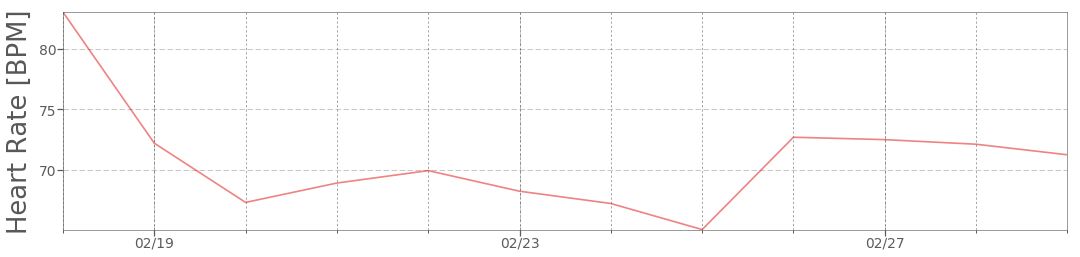

In [6]:
ax = vis.plot_line(date_df.index, date_df['heart_bpm'], **vis_dict)

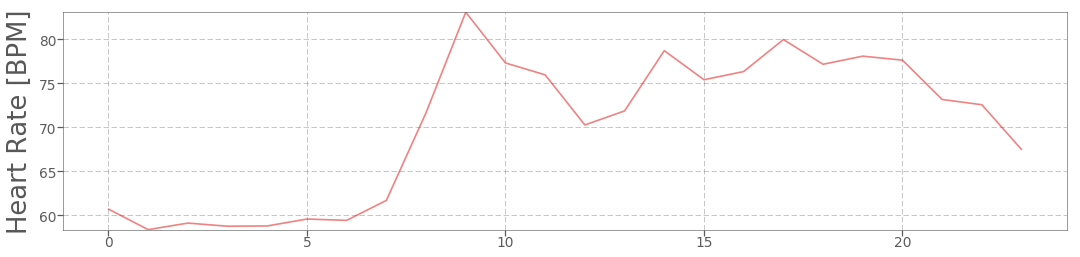

In [7]:
ax = vis.plot_line(hourly_df.index, hourly_df['heart_bpm'], **vis_dict)

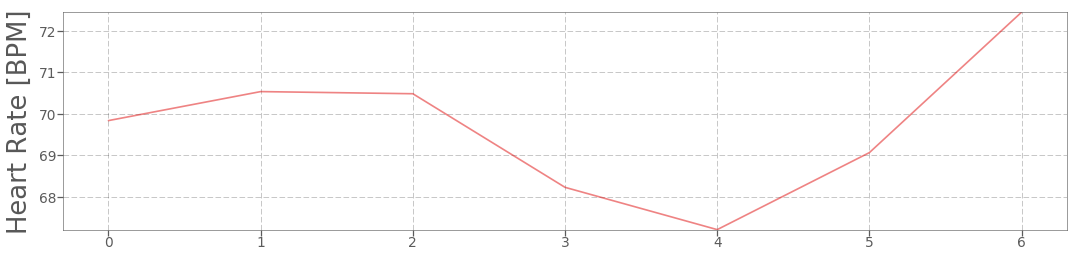

In [8]:
ax = vis.plot_line(weekday_df.index, weekday_df['heart_bpm'], **vis_dict)